# Areal interpolation: Tracts to Voting Precincts

This notebook demonstrates the interpolation of an intensive variable (Pct Youth) measured for the census tracts tracts in Riverside and San Bernardino counties in California to the voting precincts in the respective counties.

In [1]:
import tobler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import geopandas

In [3]:
tracts = geopandas.read_file("https://ndownloader.figshare.com/files/20460645") 

In [4]:
tracts.shape

(822, 8)

There are 822 tracts in the two counties.

In [5]:
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,IE_NAME,IE_pct_you,pct Youth,geometry
0,06,071,004201,06071004201,"Census Tract 42.01, San Bernardino County, Cal...",0.214690,0.21,"POLYGON ((-117.34794 34.13602, -117.34725 34.1..."
1,06,071,004202,06071004202,"Census Tract 42.02, San Bernardino County, Cal...",0.204101,0.20,"POLYGON ((-117.32259 34.11639, -117.32259 34.1..."
2,06,071,004401,06071004401,"Census Tract 44.01, San Bernardino County, Cal...",0.237707,0.24,"POLYGON ((-117.35944 34.09045, -117.35944 34.0..."
3,06,065,041912,06065041912,"Census Tract 419.12, Riverside County, California",0.198622,0.20,"POLYGON ((-117.65093 33.87887, -117.65086 33.8..."
4,06,065,043822,06065043822,"Census Tract 438.22, Riverside County, California",0.127917,0.13,"POLYGON ((-117.21237 34.00421, -117.20705 34.0..."


<AxesSubplot:>

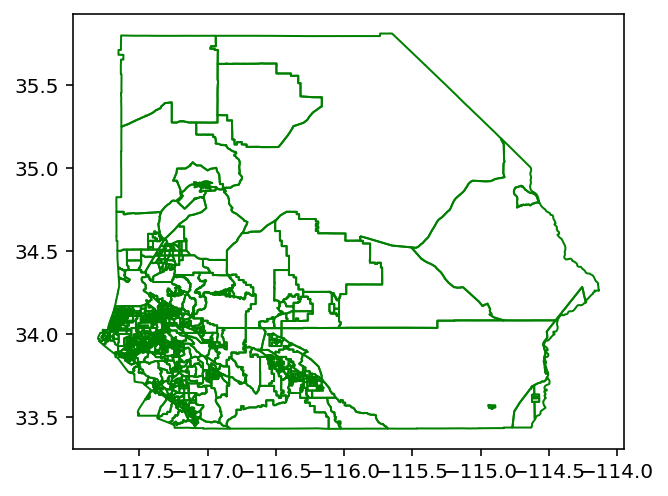

In [6]:
tracts.plot(facecolor='none', edgecolor='g')

## Precincts

In [7]:
precincts = geopandas.read_file("https://ndownloader.figshare.com/files/20460549") 


In [8]:
precincts.shape

(3780, 11)

For the 3780 precincts in the two counties, we wish to obtain estimates of the percentage of the  population that is youth.

<AxesSubplot:>

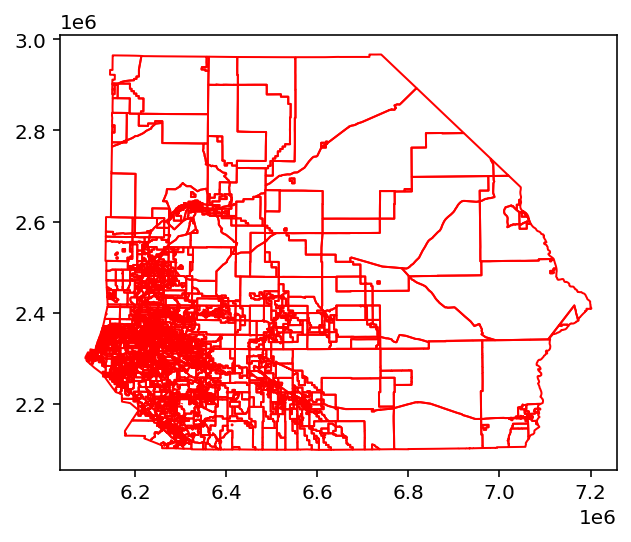

In [9]:
precincts.plot(facecolor='none', edgecolor='r')

## Interpolation

In [10]:
estimates = tobler.area_weighted.area_interpolate(tracts, precincts, intensive_variables=['pct Youth'])

Source and target dataframes have different crs. Please correct.


Notice the warning about different crs. 

In [11]:
estimates

As a result of the different crs, tobler will not carry out the interpolation. We need to fix the crs issue first by setting the tract geometries to use the precincts crs

In [12]:
tracts = tracts.to_crs(precincts.crs) 

In [13]:
estimates = tobler.area_weighted.area_interpolate(tracts, precincts, intensive_variables=['pct Youth'])

/Users/knaaptime/Dropbox/projects/tobler/tobler/util/util.py:28: UserWarning: nan values in variable: pct Youth, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")


In [14]:
estimates

,pct Youth,geometry
0,0.428968,"POLYGON ((6228650.584 2309697.165, 6228668.998..."
1,0.239964,"POLYGON ((6228470.107 2305313.232, 6228657.743..."
2,0.700188,"POLYGON ((6234276.717 2304432.388, 6234351.995..."
3,0.539245,"POLYGON ((6234612.359 2308277.484, 6234600.967..."
4,0.187685,"POLYGON ((6223379.904 2303618.143, 6223515.956..."
...,...,...
3775,0.219941,"POLYGON ((6125511.672 2317450.798, 6125713.681..."
3776,0.219951,"POLYGON ((6125511.672 2317450.798, 6125498.224..."
3777,0.180140,"POLYGON ((6125526.288 2320091.616, 6125511.672..."
3778,0.110004,"POLYGON ((7046733.459 2650252.604, 7046700.701..."


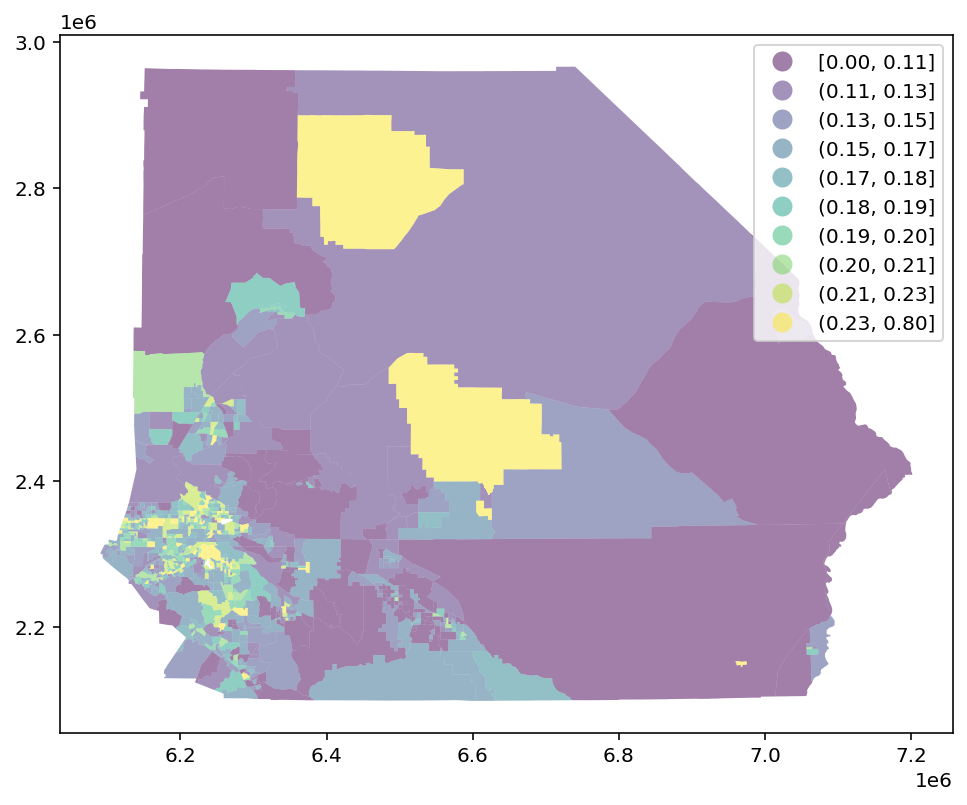

In [15]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = tracts.plot(column='pct Youth', ax=ax, legend=True, alpha=0.5, scheme='Quantiles', k=10)
plt.show()

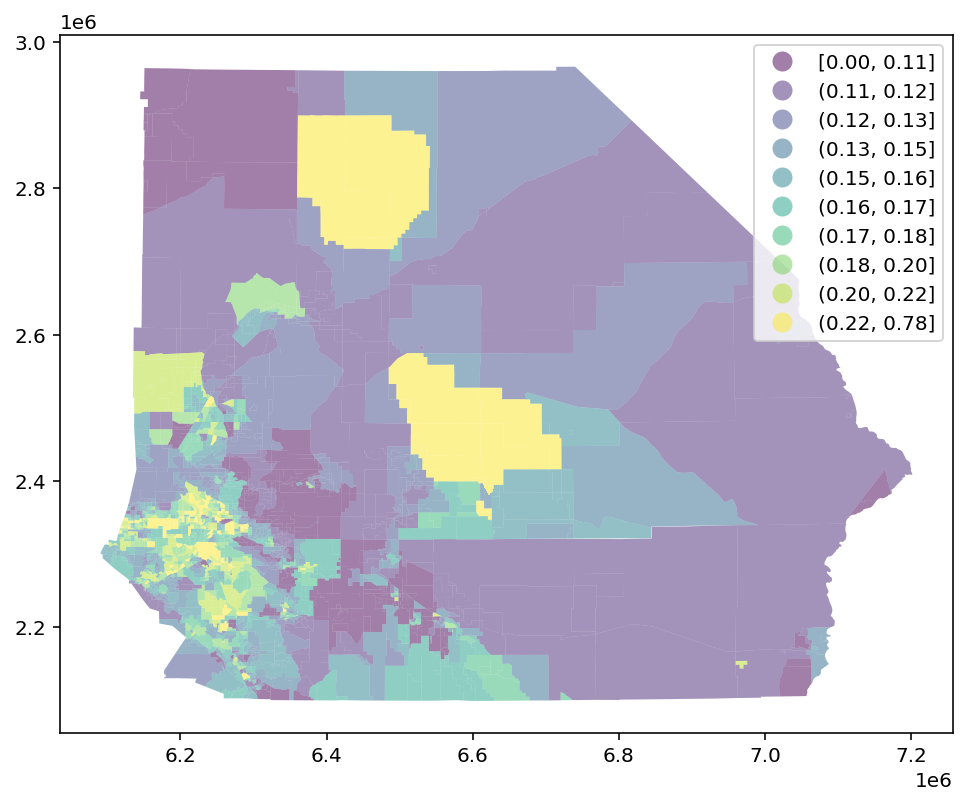

In [16]:
precincts['pct Youth'] = estimates['pct Youth']
f, ax = plt.subplots(1, figsize=(8, 8))
ax = precincts.plot(column='pct Youth', ax=ax, legend=True, alpha=0.5, scheme='Quantiles', k=10)
plt.show()